## Case Study 1

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import skew

In [11]:
df_train= pd.read_csv("/Users/vrunda/Library/CloudStorage/GoogleDrive-shahvrunda231296@gmail.com/.shortcut-targets-by-id/1If4Xq7JBYnZ3iRTOYUU8DDWlZlr7e5rJ/Dataset, Assignments, Interview Prep - D1/dataset/titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df_test= pd.read_csv('/Users/vrunda/Library/CloudStorage/GoogleDrive-shahvrunda231296@gmail.com/My Drive/Datasets/tested.csv')
df_test.shape

(418, 12)

In [28]:
# lets concat it to create a population dataset

df= pd.concat([df_train, df_test])
df.reset_index(inplace=True, drop=True)
df.shape

(1309, 12)

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,1309.0,0.377387,0.484918,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


<Axes: xlabel='Fare', ylabel='Density'>

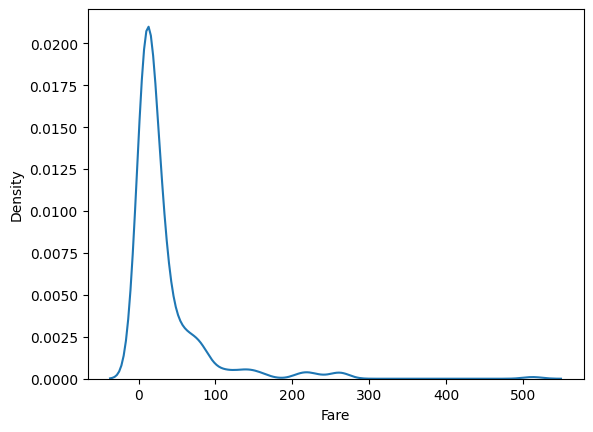

In [ ]:
sns.kdeplot(data=df, x='Fare')

In [ ]:
sample_size= 50
number_of_sample= 100 

samples=[]
for i in range(100): 
    samples.append(df['Fare'].dropna().sample(50).values.tolist())

samples= np.array(samples)

sample_mean= samples.mean(axis=1)
sample_mean

array([37.252416, 47.752416, 34.096246, 35.051   , 31.37975 , 35.403834,
       35.914414, 30.916082, 35.63417 , 26.245254, 49.616418, 37.046084,
       37.828   , 26.576   , 37.513412, 33.13875 , 34.258752, 25.373082,
       33.2555  , 26.07058 , 39.863168, 36.48725 , 34.318498, 52.202914,
       35.280918, 35.965746, 31.789584, 28.165252, 28.043246, 34.178164,
       27.913584, 26.944494, 33.335168, 33.840332, 29.945998, 25.862834,
       30.816332, 49.724584, 48.727416, 25.39908 , 32.659754, 22.266334,
       31.448582, 42.607166, 28.588584, 48.467   , 41.681082, 38.463916,
       38.500834, 29.411498, 32.648252, 24.558332, 27.808998, 37.974418,
       21.729332, 26.413508, 21.298662, 31.85266 , 31.43467 , 37.058998,
       47.710996, 26.029248, 17.463418, 33.155332, 39.270164, 41.861496,
       31.969246, 29.084998, 28.873588, 27.785836, 33.596246, 42.920414,
       24.557164, 21.0165  , 35.405084, 25.280922, 36.219   , 30.655166,
       28.032668, 32.678918, 47.114168, 42.137748, 

<Axes: ylabel='Density'>

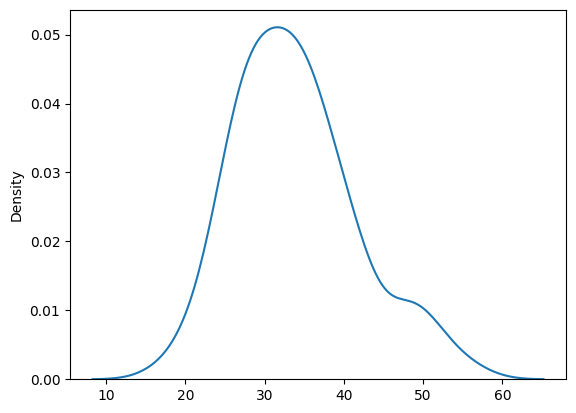

In [49]:
sns.kdeplot(sample_mean) # looks pretty normal

In [60]:
mean_samples= sample_mean.mean()
mean_pop= df['Fare'].mean()

print(mean_samples)
print(mean_pop)

33.87575522
33.29547928134557


In [66]:
print(sample_mean.std())
print(df['Fare'].std()/np.sqrt(sample_size))


7.655019479451458
7.319781059420959


In [ ]:
upper_limit= sample_mean.mean() + (2 * sample_mean.std()/np.sqrt(sample_size))
lower_limit= sample_mean.mean() - (2 * sample_mean.std()/np.sqrt(sample_size))
print(lower_limit, upper_limit)

31.710588746385906 36.040921693614095


## Case study 2

In [72]:
# What is the average income of indians 

"""
Step-by-step process: 

Collect multiple random samples of salaries for a representative group
of Indians. Each sample should be large enough (usually n> 30) to ensure
that CLT holds. Make sure the samples are representative and unbaised to avoid skewed results. 

Calculate the sample mean (average salary) and sample std for each sample. 

Calculate the average of the sample means. This value will be your best estimate 
of the population mean (average salary of all Indians.

Calculate tje standard error of the sample means, which is the standard deviation 
of the sample means divided by the square root of the number of samples. 

Calculate the confidence interval around the average of the sample means 
to get range within which the true population mean likely falls. 

For a 95% confidence interval: 
lower_limit= average_sample_means - 1.96 * std error 
upper_limit= average_sample_means + 1.96 * std error 

Report the estimated average salary and the confidence interval. 

"""

'\nStep-by-step process: \n\nCollect multiple random samples of salaries for a representative group\nof Indians. Each sample should be large enough (usually n> 30) to ensure\nthat CLT holds. Make sure the samples are representative and unbaised to avoid skewed results. \n\nCalculate the sample mean (average salary) and sample std for each sample. \n\nCalculate the average of the sample means. This value will be your best estimate \nof the population mean (average salary of all Indians.\n\nCalculate tje standard error of the sample means, which is the standard deviation \nof the sample means divided by the square root of the number of samples. \n\nCalculate the confidence interval around the average of the sample means \nto get range within which the true population mean likely falls. \n\nFor a 95% confidence interval: \nlower_limit= average_sample_means - 1.96 * std error \nupper_limit= average_sample_means + 1.96 * std error \n\nReport the estimated average salary and the confidence i

In [75]:
# set the parameter 

population_size =100000
sample_size= 50
number_of_sample= 100

# log normal param
mean= 4.5
sigma= 0.8
population_salaries= np.random.lognormal(mean= mean, sigma= sigma, size= population_size)
sample_mean= []
sample_std= []

for i in range(number_of_sample): 
    samples_salaries= np.random.choice(population_salaries, size= sample_size)
    sample_mean.append(np.mean(samples_salaries))
    sample_std.append(np.std(samples_salaries))


In [86]:
average_sample_means= np.mean(sample_mean)
print(average_sample_means)
std_error= np.std(sample_std)/ np.sqrt(sample_size)
print(std_error)

125.64241096067678
5.257313019708577


In [87]:
lower_limit= average_sample_means - 1.96 * std_error
upper_limit= average_sample_means + 1.96 * std_error 

print(lower_limit, upper_limit)

115.33807744204798 135.9467444793056


In [89]:
print(population_salaries.mean())

124.17044221853884


## Case study 3

In [ ]:
df= pd.read_csv('/Users/vrunda/Library/CloudStorage/GoogleDrive-shahvrunda231296@gmail.com/.shortcut-targets-by-id/1If4Xq7JBYnZ3iRTOYUU8DDWlZlr7e5rJ/Dataset, Assignments, Interview Prep - D1/dataset/batsman_runs_ipl.csv')

print(df.shape)
df.head()

(605, 2)


,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25


In [99]:
df.isnull().sum()

batter         0
batsman_run    0
dtype: int64

average sampling mean: 463.52236
population mean: 464.42809917355373
average sampling std: 130.41635248093084
population std: 139.338623471043
lower_limit: 207.90630913737556 to upper_limit: 719.1384108626244


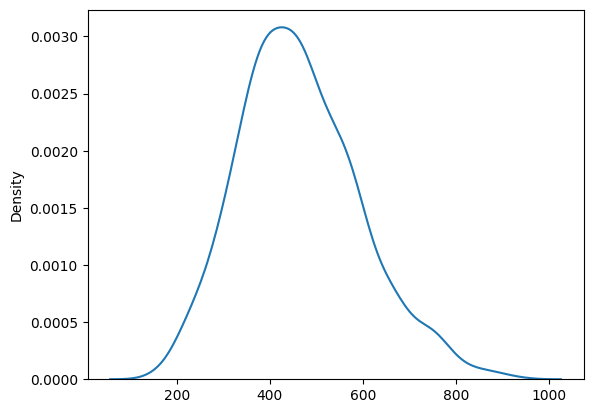

In [121]:
sample_size=50
num_samples= 1000

# collecting samples of size 50, over 1000 times 
samples=[]
for i in range(num_samples): 
    samples.append(df['batsman_run'].dropna().sample(sample_size).values.tolist())

# calculating mean for each sample
samples= np.array(samples)
sample_mean= samples.mean(axis=1)

# plotting sample means to check the shape 
sns.kdeplot(sample_mean) # its looks pretty normal

# now that we have each sample means, we calculate mean of those 
sampling_mean= sample_mean.mean()
std_error= sample_mean.std()

# population mean and std  
pop_mean= df['batsman_run'].mean()
theo_std_error= df['batsman_run'].std()/ np.sqrt(sample_size)

# print to check 
print(f"average sampling mean: {sampling_mean}")
print(f"population mean: {pop_mean}")
print(f"average sampling std: {std_error}")
print(f"population std: {theo_std_error}")

# limits with 95% confidence interval
lower_limit= sampling_mean -1.96 * std_error
upper_limit= sampling_mean + 1.96 * std_error

print(f"lower_limit: {lower_limit} to upper_limit: {upper_limit}")

### Confindence Inteval

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df_train= pd.read_csv("/Users/vrunda/Library/CloudStorage/GoogleDrive-shahvrunda231296@gmail.com/.shortcut-targets-by-id/1If4Xq7JBYnZ3iRTOYUU8DDWlZlr7e5rJ/Dataset, Assignments, Interview Prep - D1/dataset/titanic.csv")
df_test= pd.read_csv('/Users/vrunda/Library/CloudStorage/GoogleDrive-shahvrunda231296@gmail.com/My Drive/Datasets/tested.csv')

In [6]:
df= pd.concat([df_train, df_test]) # default axis= 0
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: ylabel='Density'>

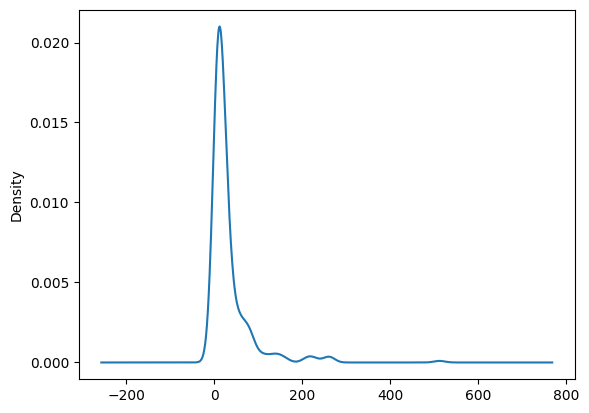

In [7]:
df['Fare'].plot(kind='kde')

In [38]:
# creating sameple of size=, num_of_saple= 10 

sample_size= 30
number_of_sample= 10 

samples= []
samples_std= []
for i in range(10):
    x= df['Fare'].dropna().sample(30).values
    samples_std.append(x.std())
    samples.append(x.tolist())

samples= np.array(samples)

samples_mean= samples.mean(axis=1)
samples_std_mean= np.mean(samples_std)

<Axes: ylabel='Density'>

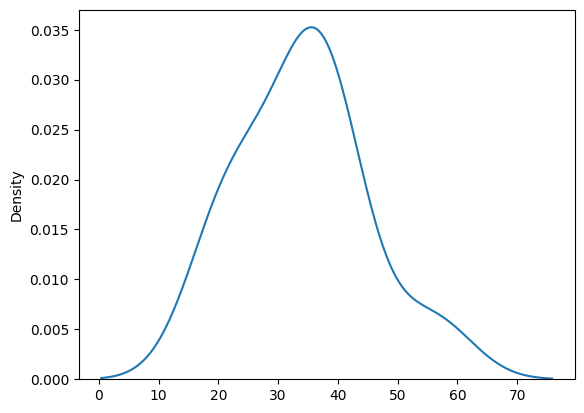

In [39]:
sns.kdeplot(samples_mean)

In [42]:
lower_limit= samples_mean.mean() - 2.042 * (samples_std_mean/ np.sqrt(30))
upper_limit= samples_mean.mean() + 2.042 * (samples_std_mean/ np.sqrt(30))

print(lower_limit, upper_limit)

15.605663109669717 52.631391556996945


In [43]:
df['Fare'].mean()

np.float64(33.29547928134557)